In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

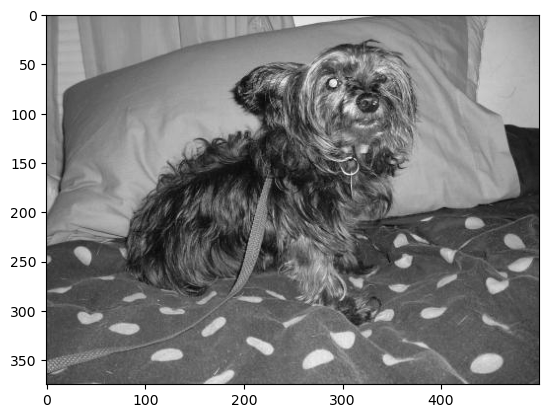

In [4]:
DATADIR = r"D:\pc\Downloads\kagglecatsanddogs_5340\PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [5]:
print(img_array)

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


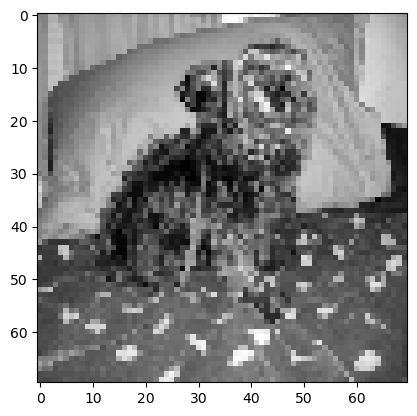

In [16]:
IMG_SIZE = 70
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [17]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [20]:
print(len(training_data))

24946


In [21]:
import random
random.shuffle(training_data)

In [27]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
1
0
1
0
0
0
1


In [28]:
X = []
y = []

In [29]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [30]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()